In [200]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Support Vector Machine Libraries
from sklearn import svm
## Decision Tree Libraries
from sklearn import tree
## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
##### Complete Data preperation process for preparing X_train, y_train & X_test, y_test
## Importing the Dataset and applying threshold
data= pd.read_csv("Features_Variant_1.csv")
data['bin'] = np.where(data['no_of_comments']>=5, '1', '0')
test_sample=pd.read_excel("Final_Testset.xlsx")
test_sample['bin'] = np.where(test_sample['no_of_comments']>=5, '1', '0')
## Splitting the Dataset 
train_data, test_data1 = train_test_split(data, test_size = 0.3, random_state = 20)
## Final Test Data
test_data=test_data1.append(test_sample, ignore_index = True)
## data preperation
y_train=train_data['bin']
y_test=test_data['bin']
x_train=train_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
x_test=test_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_train = fea_scaling.transform(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_test = fea_scaling.transform(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])


C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [8]:
#### Support Vector Machine 
## Function for calculation cross validation scores
def a(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=3, return_train_score=True)
    return scores
## Linear Kernel Function vaaries of C ( Margin Parameter)
clf = svm.SVC(kernel='linear', C=0.1)
score1=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=1)
score2=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=10)
score3=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=100)
score4=a(clf,X_train,y_train)

In [10]:
print(score1)
print(score2)
print(score3)
print(score4)

{'fit_time': array([5.12928605, 5.11620402, 5.54118562]), 'score_time': array([0.9345026 , 0.88559318, 0.92657566]), 'test_score': array([0.90466722, 0.90004187, 0.90119322]), 'train_score': array([0.90108855, 0.9040293 , 0.90397698])}
{'fit_time': array([10.32139111, 11.16814184,  9.73497272]), 'score_time': array([0.93251586, 0.91654921, 0.90158963]), 'test_score': array([0.90634157, 0.90098388, 0.90203056]), 'train_score': array([0.90176889, 0.90518053, 0.90408163])}
{'fit_time': array([28.1138835 , 32.78933525, 32.36546493]), 'score_time': array([0.91954136, 0.90358829, 0.9166255 ]), 'test_score': array([0.90602763, 0.90119322, 0.90244924]), 'train_score': array([0.90171656, 0.90518053, 0.90429095])}
{'fit_time': array([153.50459886, 160.07111692, 179.2258327 ]), 'score_time': array([0.92059731, 0.86261487, 0.92153597]), 'test_score': array([0.90581833, 0.90129789, 0.90244924]), 'train_score': array([0.90166422, 0.90518053, 0.90444793])}


In [11]:
## Ploynomial Kernel Function 
clf = svm.SVC(kernel='poly', degree=2)
score5=a(clf,X_train,y_train)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
score5

{'fit_time': array([16.01015067, 16.20459509, 17.36856174]),
 'score_time': array([1.56880879, 1.58082056, 1.56581402]),
 'test_score': array([0.86929678, 0.8660247 , 0.86947875]),
 'train_score': array([0.86989743, 0.87012036, 0.86933543])}

In [13]:
clf = svm.SVC(kernel='poly', degree=3)
score6=a(clf,X_train,y_train)
score6

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'fit_time': array([ 7.11394429, 17.9718976 , 16.07103276]),
 'score_time': array([0.64430737, 1.51993465, 1.55389833]),
 'test_score': array([0.87180829, 0.8680134 , 0.87021143]),
 'train_score': array([0.87288047, 0.87399267, 0.87247514])}

In [14]:
clf = svm.SVC(kernel='poly', degree=4)
score7=a(clf,X_train,y_train)
score7

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'fit_time': array([108.73230386,  95.24934721, 163.96740746]),
 'score_time': array([1.64565253, 1.64061427, 1.61573529]),
 'test_score': array([0.86312265, 0.86026795, 0.86204731]),
 'train_score': array([0.86665271, 0.86860283, 0.866719  ])}

In [15]:
## Support Vector Machine with Sigmoid function
clf = svm.SVC(kernel='sigmoid', C=0.1)
score8=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=1)
score9=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=10)
score10=a(clf,X_train,y_train)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base

In [88]:
clf = svm.SVC(kernel='sigmoid', C=0.001)
score25=a(clf,X_train,y_train)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [89]:
print(score8)
print(score9)
print(score10)
print(score25)

{'fit_time': array([6.9673655 , 6.65520787, 6.85063744]), 'score_time': array([2.19617009, 2.24196744, 2.22606015]), 'test_score': array([0.80410213, 0.80353779, 0.81316726]), 'train_score': array([0.80819552, 0.80795395, 0.80538985])}
{'fit_time': array([6.26121306, 6.35401249, 6.44733334]), 'score_time': array([2.09938717, 2.09245467, 2.18023038]), 'test_score': array([0.80096275, 0.80029307, 0.8090852 ]), 'train_score': array([0.80474147, 0.80408163, 0.80083726])}
{'fit_time': array([6.20839047, 6.13720679, 5.7805407 ]), 'score_time': array([2.10038733, 2.02896094, 1.61676216]), 'test_score': array([0.80148598, 0.80039774, 0.80866653]), 'train_score': array([0.80458447, 0.8040293 , 0.80052329])}
{'fit_time': array([4.17882681, 4.07010221, 4.28353047]), 'score_time': array([1.61173415, 1.62270737, 1.62168217]), 'test_score': array([0.82126413, 0.82227339, 0.82363408]), 'train_score': array([0.82248273, 0.82386185, 0.82082679])}


In [17]:
## Decision Tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy")
score11=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
score12=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
score13=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=8)
score14=a(clf,X_train,y_train)

In [18]:
print(score11)
print(score12)
print(score13)
print(score14)

{'fit_time': array([0.26508784, 0.26628995, 0.26629615]), 'score_time': array([0.03291225, 0.03191566, 0.03290868]), 'test_score': array([0.87986605, 0.87973624, 0.8795269 ]), 'train_score': array([0.99806364, 0.99790686, 0.99769754])}
{'fit_time': array([0.09675217, 0.09675002, 0.09470773]), 'score_time': array([0.03091788, 0.03091431, 0.02298951]), 'test_score': array([0.91209711, 0.90203056, 0.90820599]), 'train_score': array([0.90626963, 0.90947148, 0.90821559])}
{'fit_time': array([0.13663411, 0.13564706, 0.13563585]), 'score_time': array([0.03291225, 0.03091502, 0.03091645]), 'test_score': array([0.91345751, 0.9025539 , 0.90946201]), 'train_score': array([0.90956667, 0.91397174, 0.91214024])}
{'fit_time': array([0.18649626, 0.19249344, 0.18749881]), 'score_time': array([0.03192997, 0.0329113 , 0.03190541]), 'test_score': array([0.91293428, 0.90244924, 0.90946201]), 'train_score': array([0.91956249, 0.92679226, 0.92271062])}


In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
score15=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=12)
score16=a(clf,X_train,y_train)

In [20]:
print(score15)
print(score16)

{'fit_time': array([0.21442962, 0.21939945, 0.2054584 ]), 'score_time': array([0.03291392, 0.0279367 , 0.03091693]), 'test_score': array([0.90696944, 0.89784384, 0.90380992]), 'train_score': array([0.93044798, 0.93694401, 0.93296703])}
{'fit_time': array([0.2243979 , 0.21243262, 0.23338485]), 'score_time': array([0.03092098, 0.03091288, 0.03191471]), 'test_score': array([0.90194642, 0.89470379, 0.89773917]), 'train_score': array([0.94426418, 0.95143904, 0.94657248])}


In [21]:
### Boosting with Adaboost method and classification algorithm is Decision Tree
## Hyperparameter n_estimator=25 is constant but we will vary the max_depth for pruning
tree_clf = DecisionTreeClassifier()
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score17 = a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=3)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score18=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score19=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=8)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score20=  a(boostree, X_train, y_train)

In [22]:
print(score17)
print(score18)
print(score19)
print(score20)

{'fit_time': array([5.40550566, 8.14123988, 4.8091464 ]), 'score_time': array([0.11568522, 0.12170982, 0.10384226]), 'test_score': array([0.90341147, 0.89428512, 0.89616914]), 'train_score': array([0.99806364, 0.99790686, 0.99769754])}
{'fit_time': array([2.2440033 , 2.25696969, 2.13329697]), 'score_time': array([0.07280183, 0.07878828, 0.08078289]), 'test_score': array([0.90937631, 0.90506594, 0.91061336]), 'train_score': array([0.91783546, 0.92218734, 0.9170068 ])}
{'fit_time': array([3.00595927, 2.97504306, 3.01413465]), 'score_time': array([0.08386779, 0.08078384, 0.08158541]), 'test_score': array([0.90246965, 0.89595981, 0.89920452]), 'train_score': array([0.93903077, 0.94118263, 0.93971743])}
{'fit_time': array([3.39483929, 3.53546453, 4.28650141]), 'score_time': array([0.04887033, 0.09977674, 0.09574223]), 'test_score': array([0.89305149, 0.88653967, 0.89323843]), 'train_score': array([0.99528993, 0.99089482, 0.99005756])}


In [23]:
### Boosting with Adaboost method and classification algorithm is Decision Tree
## Hyperparameter n_estimator=50 is constant but we will vary the max_depth for pruning
tree_clf = DecisionTreeClassifier()
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score21 = a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=3)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score22=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score23=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=8)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score24=  a(boostree, X_train, y_train)

In [31]:
print(score21)
print(score22)
print(score23)
print(score24)

{'fit_time': array([16.06399989, 28.76908469, 29.92299867]), 'score_time': array([0.49467969, 0.50664783, 0.5026536 ]), 'test_score': array([0.90936759, 0.91106314, 0.9127942 ]), 'train_score': array([0.99624852, 0.99596546, 0.99591244])}
{'fit_time': array([13.87485218, 13.92676497, 13.92077875]), 'score_time': array([0.370049  , 0.36801648, 0.37699127]), 'test_score': array([0.91287115, 0.91672565, 0.91463458]), 'train_score': array([0.91980322, 0.91895527, 0.92051386])}
{'fit_time': array([18.59008121, 18.67606735, 18.74667764]), 'score_time': array([0.38496828, 0.38397145, 0.38397336]), 'test_score': array([0.9066426 , 0.91145243, 0.91152008]), 'train_score': array([0.93505689, 0.93323542, 0.93355511])}
{'fit_time': array([25.4997716 , 25.53672838, 25.36413479]), 'score_time': array([0.44780397, 0.41987252, 0.44880009]), 'test_score': array([0.9019358 , 0.90518828, 0.90426473]), 'train_score': array([0.98290598, 0.97699604, 0.97980996])}


In [90]:
s1=pd.DataFrame.from_dict(score1)
s2=pd.DataFrame.from_dict(score2)
s3=pd.DataFrame.from_dict(score3)
s4=pd.DataFrame.from_dict(score4)
s5=pd.DataFrame.from_dict(score5)
s6=pd.DataFrame.from_dict(score6)
s7=pd.DataFrame.from_dict(score7)
s8=pd.DataFrame.from_dict(score8)
s9=pd.DataFrame.from_dict(score9)
s10=pd.DataFrame.from_dict(score10)
s11=pd.DataFrame.from_dict(score11)
s12=pd.DataFrame.from_dict(score12)
s13=pd.DataFrame.from_dict(score13)
s14=pd.DataFrame.from_dict(score14)
s15=pd.DataFrame.from_dict(score15)
s16=pd.DataFrame.from_dict(score16)
s17=pd.DataFrame.from_dict(score17)
s18=pd.DataFrame.from_dict(score18)
s19=pd.DataFrame.from_dict(score19)
s20=pd.DataFrame.from_dict(score20)
s21=pd.DataFrame.from_dict(score21)
s22=pd.DataFrame.from_dict(score22)
s23=pd.DataFrame.from_dict(score23)
s24=pd.DataFrame.from_dict(score24)
s25=pd.DataFrame.from_dict(score25)

In [162]:
## Train and Test Accuracy for Linear SVM Kernel function
s1_linear_test=[s1[['test_score']].mean(axis=0),s2[['test_score']].mean(axis=0),s3[['test_score']].mean(axis=0),s4[['test_score']].mean(axis=0)]
s1_linear_train=[s1[['train_score']].mean(axis=0),s2[['train_score']].mean(axis=0),s3[['train_score']].mean(axis=0),s4[['train_score']].mean(axis=0)]
c=[0.1,1,10,100]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_Linear kernel as a function of C')

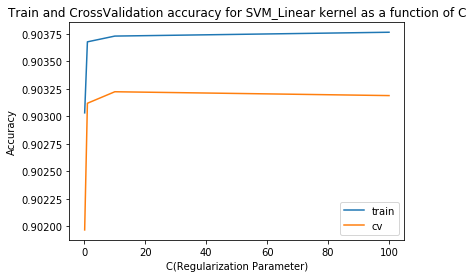

In [165]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
plt.plot(c,s1_linear_train,label='train')
plt.plot(c,s1_linear_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and CrossValidation accuracy for SVM_Linear kernel as a function of C")

In [167]:
## Train and Test Accuracy for Polynomial SVM Kernel function
s1_poly_test=[s5[['test_score']].mean(axis=0),s6[['test_score']].mean(axis=0),s7[['test_score']].mean(axis=0)]
s1_poly_train=[s5[['train_score']].mean(axis=0),s6[['train_score']].mean(axis=0),s7[['train_score']].mean(axis=0)]
d=[2,3,4]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_polynomial kernel as a function of degree')

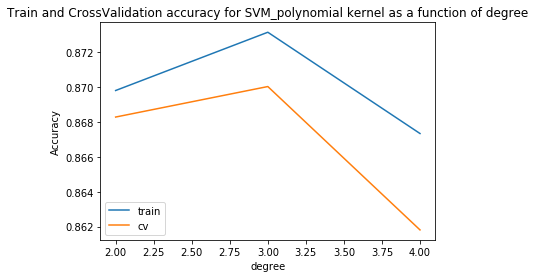

In [168]:
plt.plot(d,s1_poly_train,label='train')
plt.plot(d,s1_poly_test,label='cv')
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.legend(loc='lower left')
plt.title("Train and CrossValidation accuracy for SVM_polynomial kernel as a function of degree")

In [169]:
## Train and Test accuracy for sigmoid Kernel function 
s1_sig_test=[s25[['test_score']].mean(axis=0),s8[['test_score']].mean(axis=0),s9[['test_score']].mean(axis=0),s10[['test_score']].mean(axis=0)]
s1_sig_train=[s25[['train_score']].mean(axis=0),s8[['train_score']].mean(axis=0),s9[['train_score']].mean(axis=0),s10[['train_score']].mean(axis=0)]
c=[0.01,0.1,1,10]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C')

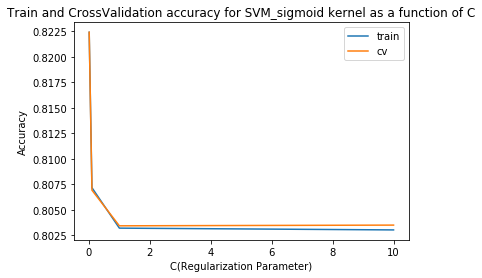

In [173]:
plt.plot(c,s1_sig_train,label='train')
plt.plot(c,s1_sig_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C")

In [191]:
## Train and Test accuracy for Decision Tree Classifier 
s1_tree_test=[s12[['test_score']].mean(axis=0),s13[['test_score']].mean(axis=0),s14[['test_score']].mean(axis=0),s15[['test_score']].mean(axis=0),s16[['test_score']].mean(axis=0)]
s1_tree_train=[s12[['train_score']].mean(axis=0),s13[['train_score']].mean(axis=0),s14[['train_score']].mean(axis=0),s15[['train_score']].mean(axis=0),s16[['train_score']].mean(axis=0)]
dep=[3,5,8,10,12]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Decision Tree as a function of Depth of the Tree')

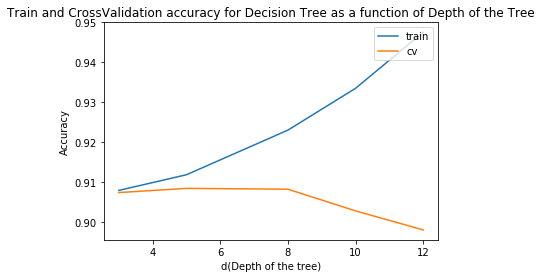

In [192]:
plt.plot(dep,s1_tree_train,label='train')
plt.plot(dep,s1_tree_test,label='cv')
plt.xlabel("d(Depth of the tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Decision Tree as a function of Depth of the Tree")

In [195]:
## Train and Test accuracy for Adaboost Classifier with n_estimators=25
s1_adaboost_test=[s18[['test_score']].mean(axis=0),s19[['test_score']].mean(axis=0),s20[['test_score']].mean(axis=0)]
s1_adaboost_train=[s18[['train_score']].mean(axis=0),s19[['train_score']].mean(axis=0),s20[['train_score']].mean(axis=0)]
dep=[3,5,8]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =25')

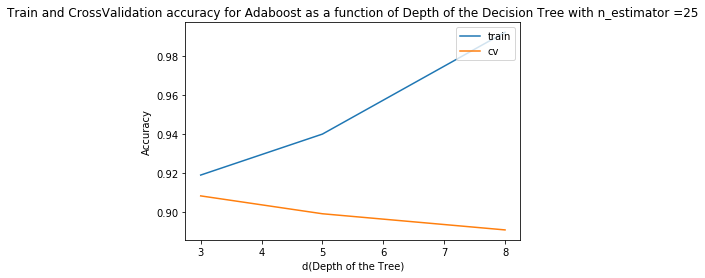

In [196]:
plt.plot(dep,s1_adaboost_train,label='train')
plt.plot(dep,s1_adaboost_test,label='cv')
plt.xlabel("d(Depth of the Tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =25")

In [193]:
## Train and Test accuracy for Adaboost Classifier with n_estimators=50
s1_adaboost1_test=[s22[['test_score']].mean(axis=0),s23[['test_score']].mean(axis=0),s24[['test_score']].mean(axis=0)]
s1_adaboost1_train=[s22[['train_score']].mean(axis=0),s23[['train_score']].mean(axis=0),s24[['train_score']].mean(axis=0)]
dep=[3,5,8]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =50')

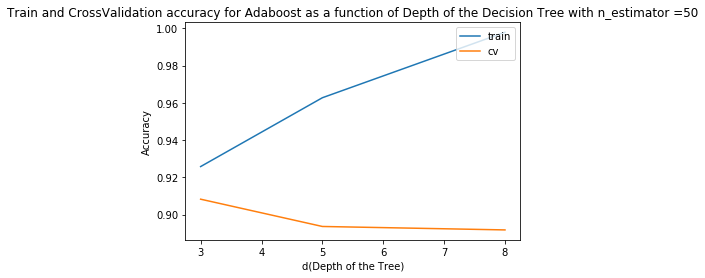

In [194]:
plt.plot(dep,s1_adaboost1_train,label='train')
plt.plot(dep,s1_adaboost1_test,label='cv')
plt.xlabel("d(Depth of the Tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =50")

In [118]:
## The best model in each algorithms 
## For SVM Linear , from the graph, the best c= 10 
## for SVM Polynomial from the graph , the best degree = 3
## for SVM Sigmoid, from the graph, the best c = 0.01
### out of all the above kernerls- linear is the one performing the best 
## for decision tree, when depth =5 , we get the best results
## for adabooost , when depth =3, we get the best results
## the best is adaboost and decision tree are soo close to each other
## we will run the best models on the test set

In [126]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf1 = svm.SVC(kernel='linear', C=10)
clf1.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [128]:
##Other SVM Kernel Functions
clf2 = svm.SVC(kernel='poly', degree=3)
clf2.fit(X_train,y_train)
clf3 = svm.SVC(kernel='sigmoid', C=0.001)
clf3.fit(X_train,y_train)
## Decision tree function
clf4 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf4.fit(X_train,y_train)
## Adaboost function
tree_clf1 = DecisionTreeClassifier(max_depth=3)
boostree1 = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
boostree1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)

In [131]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)
y_pred4=clf4.predict(X_test)
y_pred5=boostree1.predict(X_test)

In [262]:
## for SVM-Linear
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[10381   207]
 [ 1265  1432]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     10588
           1       0.87      0.53      0.66      2697

   micro avg       0.89      0.89      0.89     13285
   macro avg       0.88      0.76      0.80     13285
weighted avg       0.89      0.89      0.88     13285

0.889198343996989


In [140]:
## for SVM-Polynomial
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[10463   125]
 [ 1848   849]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     10588
           1       0.87      0.31      0.46      2697

   micro avg       0.85      0.85      0.85     13285
   macro avg       0.86      0.65      0.69     13285
weighted avg       0.85      0.85      0.82     13285

0.8514866390666165


In [141]:
## for SVM Sigmoid
print(confusion_matrix(y_test,y_pred3))  
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[10570    18]
 [ 2327   370]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     10588
           1       0.95      0.14      0.24      2697

   micro avg       0.82      0.82      0.82     13285
   macro avg       0.89      0.57      0.57     13285
weighted avg       0.85      0.82      0.77     13285

0.8234851336093338


In [142]:
## for decision tree
print(confusion_matrix(y_test,y_pred4))  
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

[[10192   396]
 [  987  1710]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10588
           1       0.81      0.63      0.71      2697

   micro avg       0.90      0.90      0.90     13285
   macro avg       0.86      0.80      0.82     13285
weighted avg       0.89      0.90      0.89     13285

0.8958976289047799


In [144]:
## for adaboost 
print(confusion_matrix(y_test,y_pred5))  
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))

[[10008   580]
 [ 1093  1604]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     10588
           1       0.73      0.59      0.66      2697

   micro avg       0.87      0.87      0.87     13285
   macro avg       0.82      0.77      0.79     13285
weighted avg       0.87      0.87      0.87     13285

0.8740684983063606


In [147]:
accuracy=[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]
Functions=['SVM_Linear','SVM_Polynomial','SVM_Sigmoid','Decision_tree','Adaboost']

(0.8, 0.9)

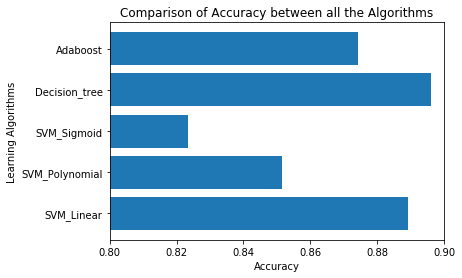

In [260]:
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.xlim([0.8, 0.9])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

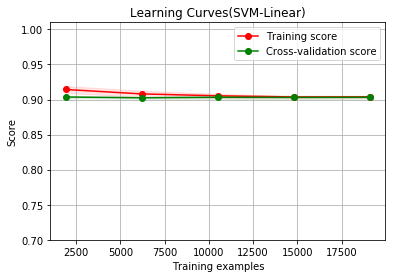

In [159]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves(SVM-Linear)"
estimator = svm.SVC(kernel='linear', C=10)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

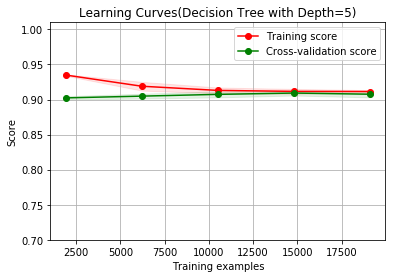

In [160]:
title = "Learning Curves(Decision Tree with Depth=5)"
estimator = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

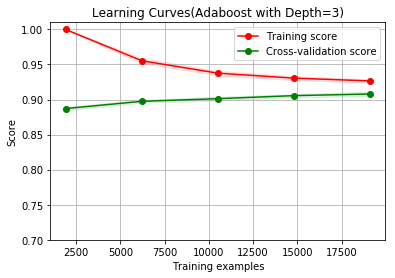

In [161]:
title = "Learning Curves(Adaboost with Depth=3)"
tree_clf = DecisionTreeClassifier(max_depth=3)
estimator = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

In [198]:
print(s1_linear_test)
print(s1_poly_test)
print(s1_sig_test)
print(s1_tree_test)
print(s1_adaboost_test)
print(s1_adaboost1_test)

[test_score    0.901967
dtype: float64, test_score    0.903119
dtype: float64, test_score    0.903223
dtype: float64, test_score    0.903188
dtype: float64]
[test_score    0.868267
dtype: float64, test_score    0.870011
dtype: float64, test_score    0.861813
dtype: float64]
[test_score    0.822391
dtype: float64, test_score    0.806936
dtype: float64, test_score    0.803447
dtype: float64, test_score    0.803517
dtype: float64]
[test_score    0.907445
dtype: float64, test_score    0.908491
dtype: float64, test_score    0.908282
dtype: float64, test_score    0.902874
dtype: float64, test_score    0.89813
dtype: float64]
[test_score    0.908352
dtype: float64, test_score    0.899211
dtype: float64, test_score    0.890943
dtype: float64]
[test_score    0.908247
dtype: float64, test_score    0.893595
dtype: float64, test_score    0.891745
dtype: float64]


In [199]:
print(s1_linear_train)
print(s1_poly_train)
print(s1_sig_train)
print(s1_tree_train)
print(s1_adaboost_train)
print(s1_adaboost1_train)

[train_score    0.903032
dtype: float64, train_score    0.903677
dtype: float64, train_score    0.903729
dtype: float64, train_score    0.903764
dtype: float64]
[train_score    0.869784
dtype: float64, train_score    0.873116
dtype: float64, train_score    0.867325
dtype: float64]
[train_score    0.82239
dtype: float64, train_score    0.80718
dtype: float64, train_score    0.80322
dtype: float64, train_score    0.803046
dtype: float64]
[train_score    0.907986
dtype: float64, train_score    0.911893
dtype: float64, train_score    0.923022
dtype: float64, train_score    0.933453
dtype: float64, train_score    0.947425
dtype: float64]
[train_score    0.91901
dtype: float64, train_score    0.939977
dtype: float64, train_score    0.992081
dtype: float64]
[train_score    0.925761
dtype: float64, train_score    0.962723
dtype: float64, train_score    0.997889
dtype: float64]


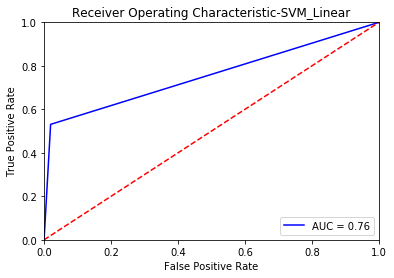

ROC_AUC Score : 0.7557049459171848


In [263]:
### ROC Curve for the SVM Linear Kernel function
y_pred1_1=np.array(y_pred1).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test1_1,y_pred1_1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic-SVM_Linear')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc1) )

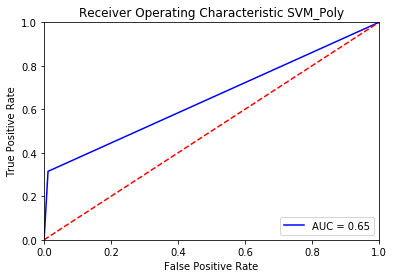

ROC_AUC Score : 0.6514941989441317


In [264]:
### ROC Curve for the SVM Polynomial function
y_pred2_2=np.array(y_pred2).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test1_1,y_pred2_2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic SVM_Poly')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc2) )

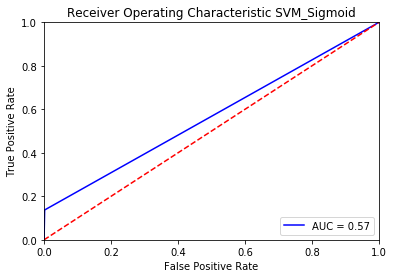

ROC_AUC Score : 0.5677447160013105


In [265]:
### ROC Curve for the SVM Sigmoid function
y_pred3_3=np.array(y_pred3).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test1_1,y_pred3_3)
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic SVM_Sigmoid')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc3) )

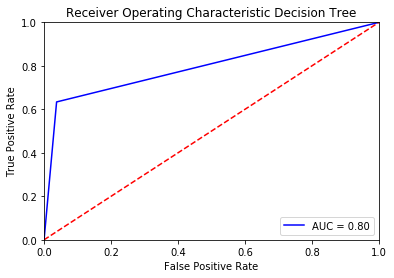

ROC_AUC Score : 0.7983184943350984


In [266]:
### ROC Curve for the Decision Tree function
y_pred4_4=np.array(y_pred4).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test1_1,y_pred4_4)
roc_auc4 = metrics.auc(fpr4, tpr4)

plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc4) )

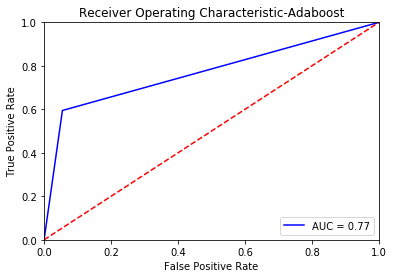

ROC_AUC Score : 0.7699779477652134


In [267]:
### ROC Curve for the Adaboost  function
y_pred5_5=np.array(y_pred5).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test1_1,y_pred5_5)
roc_auc5 = metrics.auc(fpr5, tpr5)

plt.title('Receiver Operating Characteristic-Adaboost')
plt.plot(fpr5, tpr5, 'b', label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc5) )

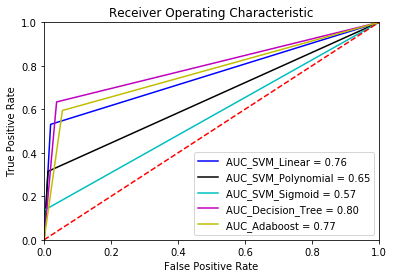

In [259]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC_SVM_Linear = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'k', label = 'AUC_SVM_Polynomial = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'c', label = 'AUC_SVM_Sigmoid = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'm', label = 'AUC_Decision_Tree = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'y', label = 'AUC_Adaboost = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
